<a href="https://colab.research.google.com/github/StephenTGibson/homemade-artificial-neural-networks/blob/main/Demo_using_network_as_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
rng = np.random.default_rng()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, TABLEAU_COLORS
import seaborn as sns

# load mlp from github
!git clone https://github.com/StephenTGibson/homemade-artificial-neural-networks.git &> /dev/null
import sys
sys.path.append('/content/homemade-artificial-neural-networks')
import multilayerPerceptron as mlp

Create a dataset  
* Non-linearly separable
* 2D for plotting

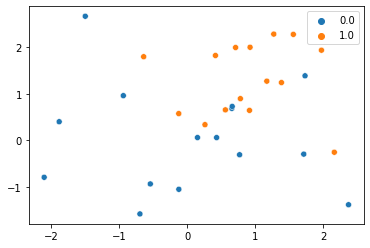

In [81]:
objectsPerClass = 15
variables = 2
classes = 2
data = mlp.createDataset_clouds(objectsPerClass, variables, classes, step=1)

sns.scatterplot(
    x=data[:, 0],
    y=data[:, 1],
    hue=data[:, 2],
)
plt.show()

Define the network  
Layers take following args: number inputs, number outputs, activation function

In [85]:
model = mlp.MultilayerPerceptron(
    mlp.Layer(variables, 4, 'sigmoid'),
    [
     mlp.Layer(4, 6, 'sigmoid'),
     mlp.Layer(6, 4, 'sigmoid'),
    ],
    mlp.Layer(4, 1, 'sigmoid'),
    learningRate=0.002,
    momentum=0.995,
    lossFunction=mlp.binaryCrossEntropy,
    )

Train the network (online SGD)

In [86]:
epochs = 2000

history = model.train(data, epochs)
print(f'Final mean loss: {(history[-1]):.3g}')

predictions = model.test(data[:, :-1])
correct = (data[:, -1] == predictions) * 1.

print(f'Final training accuracy: {(100 * correct.sum() / data.shape[0]):.1f}%')

Epoch: 0
Classification accuracy: 50.0%
Epoch: 400
Classification accuracy: 90.0%
Epoch: 800
Classification accuracy: 90.0%
Epoch: 1200
Classification accuracy: 86.7%
Epoch: 1600
Classification accuracy: 93.3%
Final mean loss: 0.161
Final training accuracy: 96.7%


Plot training loss and learnt decision boundary

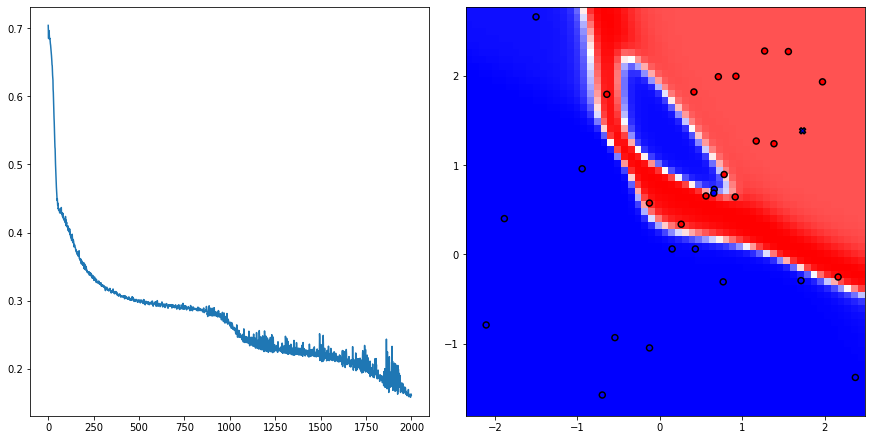

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True,)

axs[0].plot(history)

xMesh, yMesh, labelsMesh = mlp.createDecisionBoundaryMesh('binaryClass', model, data)

axs[1].pcolormesh(xMesh, yMesh, labelsMesh, cmap='bwr', shading='auto')

sns.scatterplot(
        ax=axs[1],
        x=data[:, 0],
        y=data[:, 1],
        hue=data[:, -1],
        style=correct,
        palette=['blue', 'red'],
        markers={0: 'X', 1: 'o'},
        edgecolor='black',
        linewidth=1.5,
        )

axs[1].get_legend().remove()
plt.show()